<h1> <b> First-Come First-Serve 

<p> The modules imported were made by our team and can be accessed in fcfs.py

In [30]:
from fcfs import Process,print_process_info, create_gantt_chart, plot_histograms, run_simulations

<h2> Simulation </h2>
<p> We'll create multiple simulations 

In [31]:
num_simulations = 10
min_processes = 5
max_processes = 30

fcfs_results, fcfs_processes, cpu_utilization = run_simulations(num_simulations, min_processes, max_processes)

<h2> Visualization 

<p> Gantt Chart

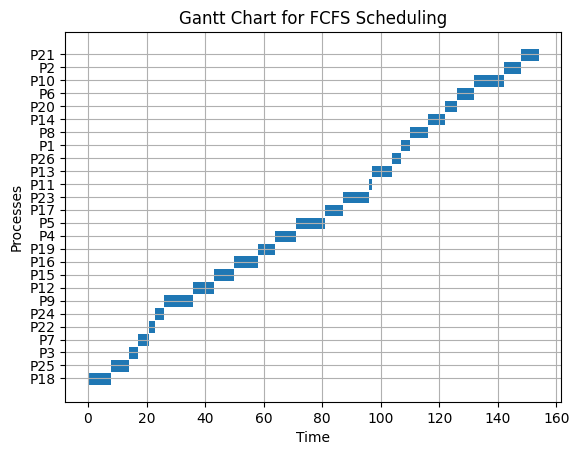

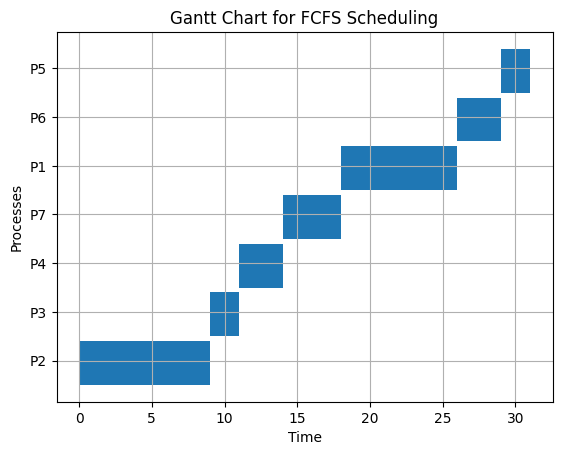

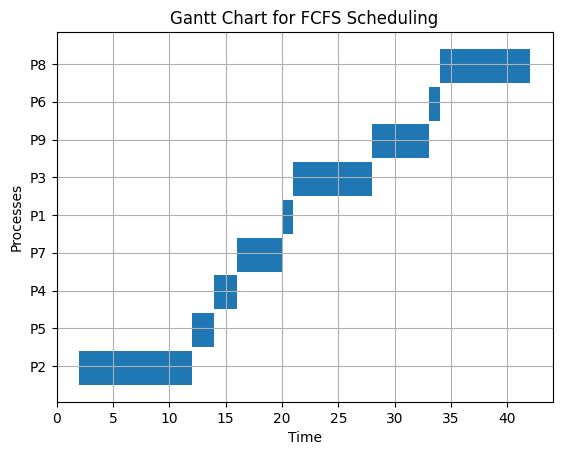

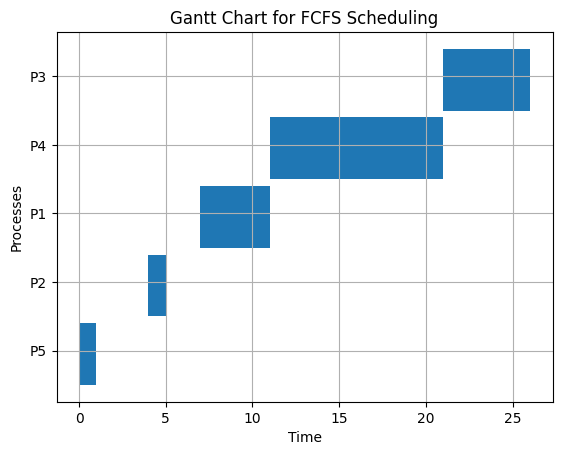

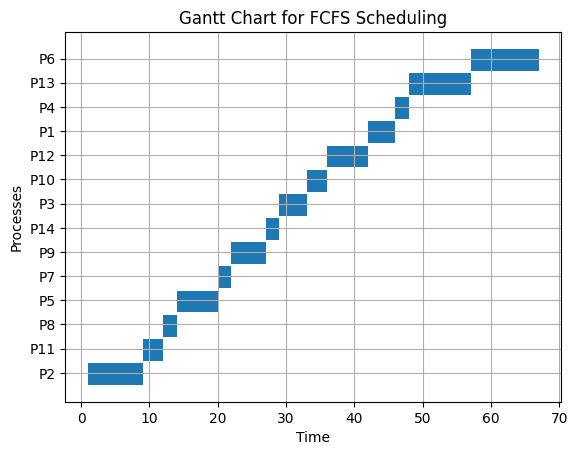

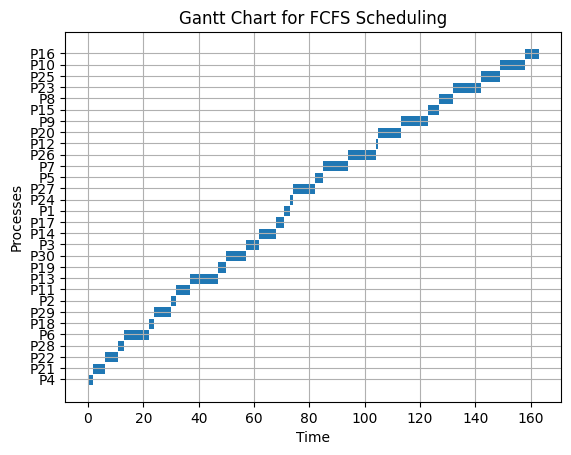

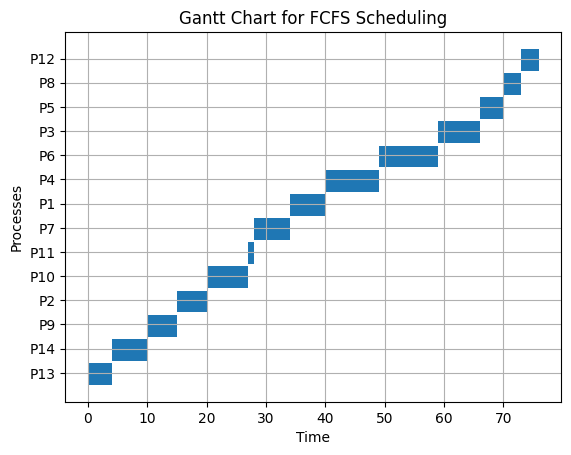

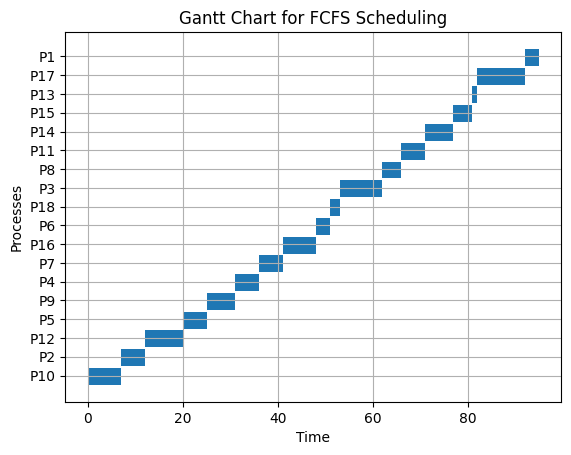

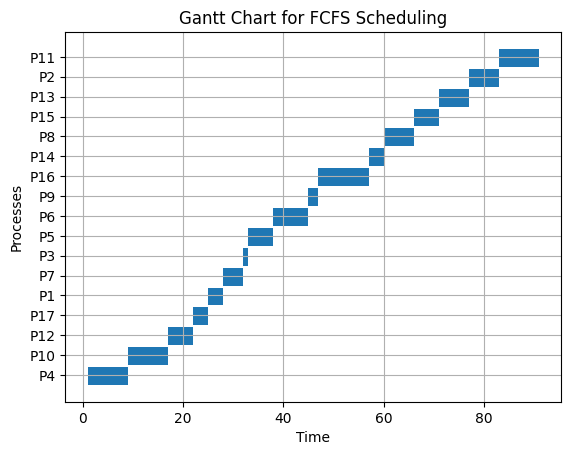

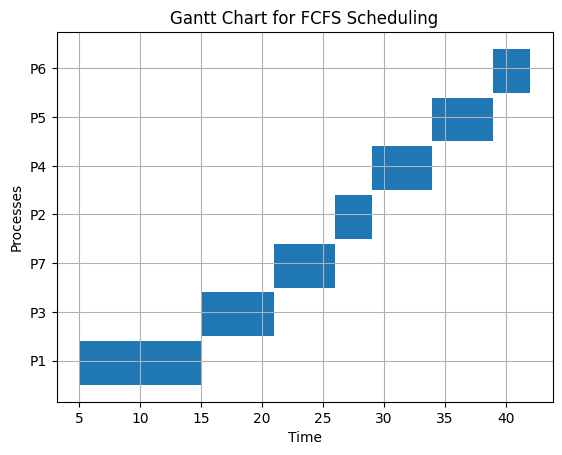

In [32]:
for x in range(num_simulations):
    create_gantt_chart(fcfs_processes[x])

Waiting Time / Turnaround Time histograms

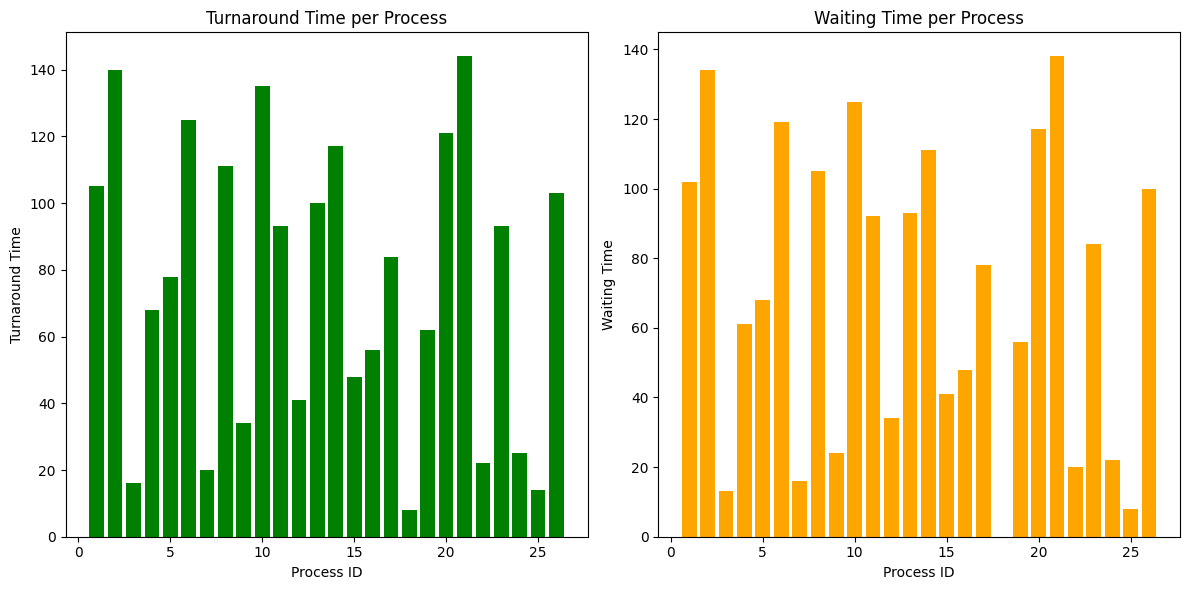

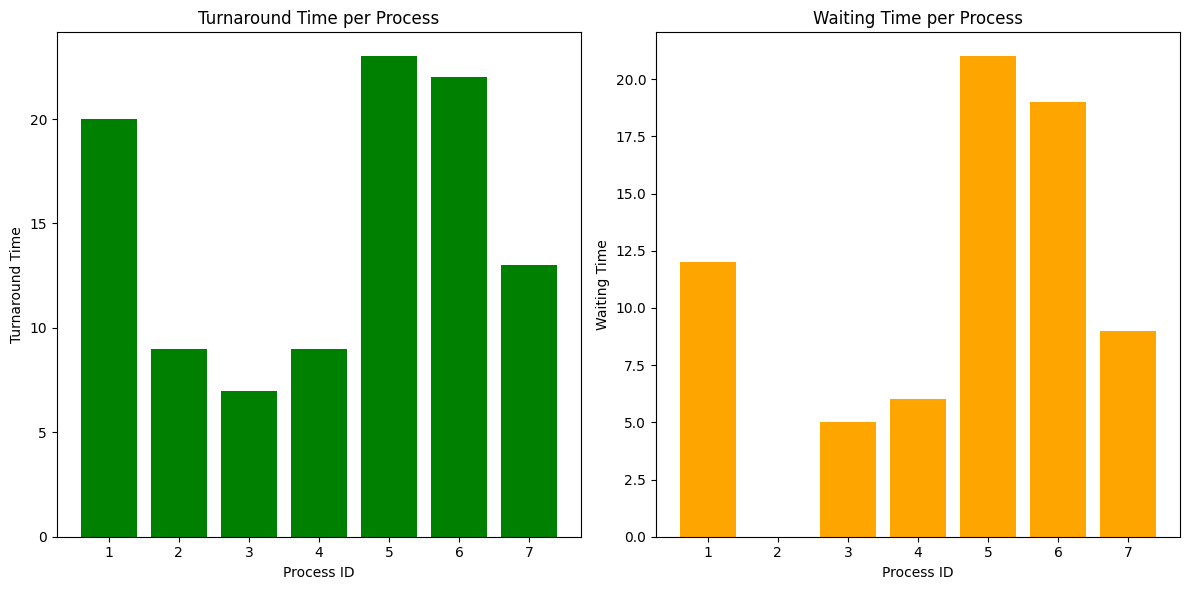

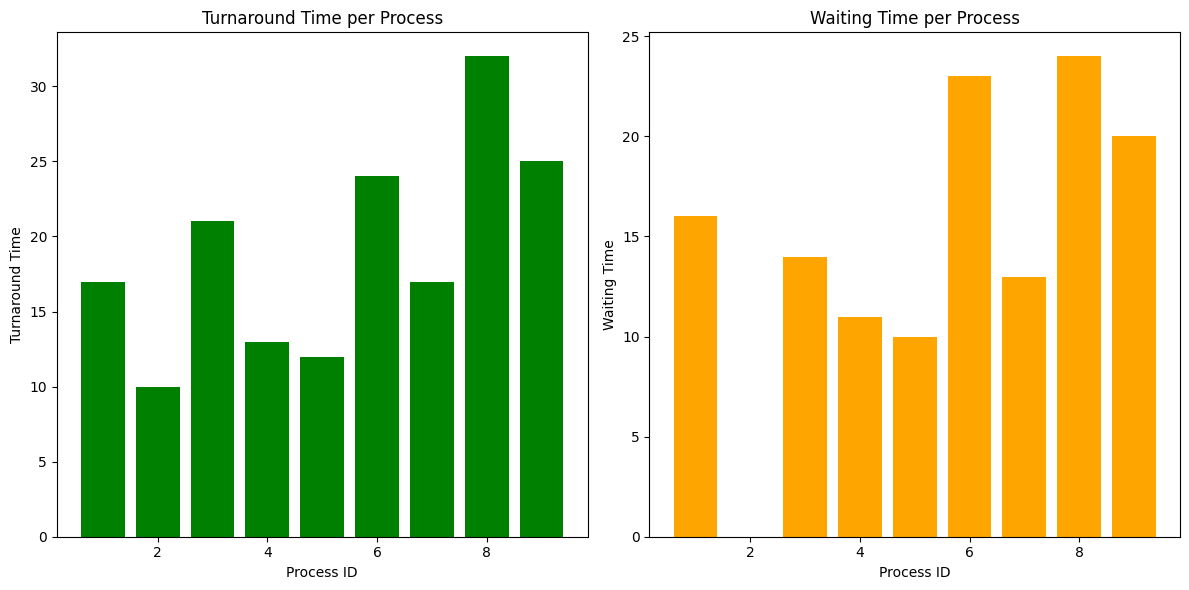

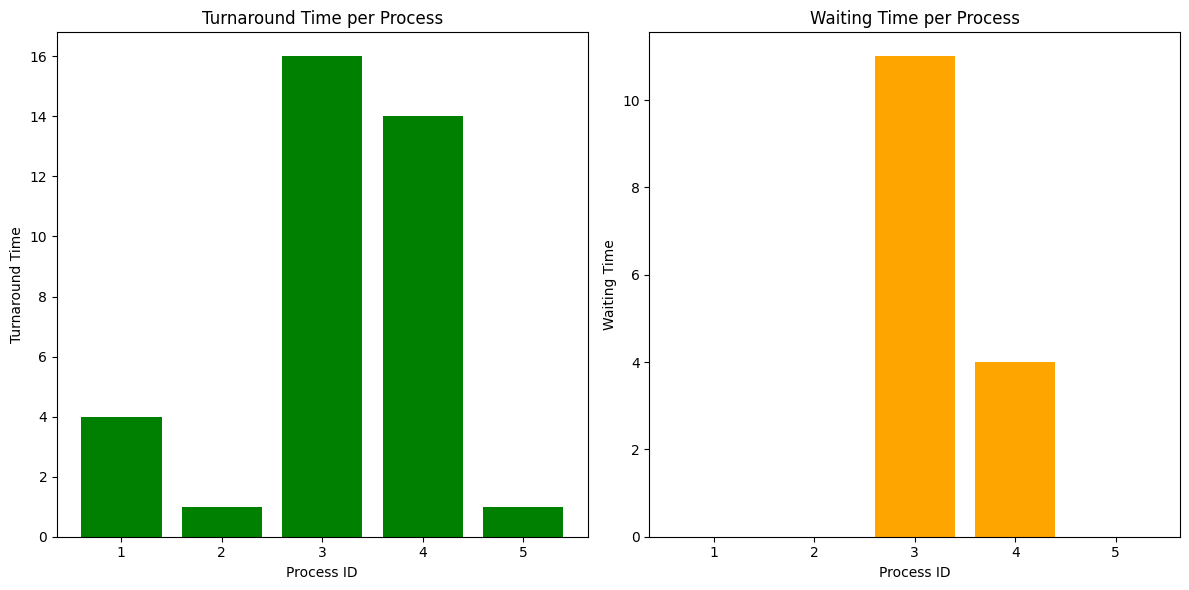

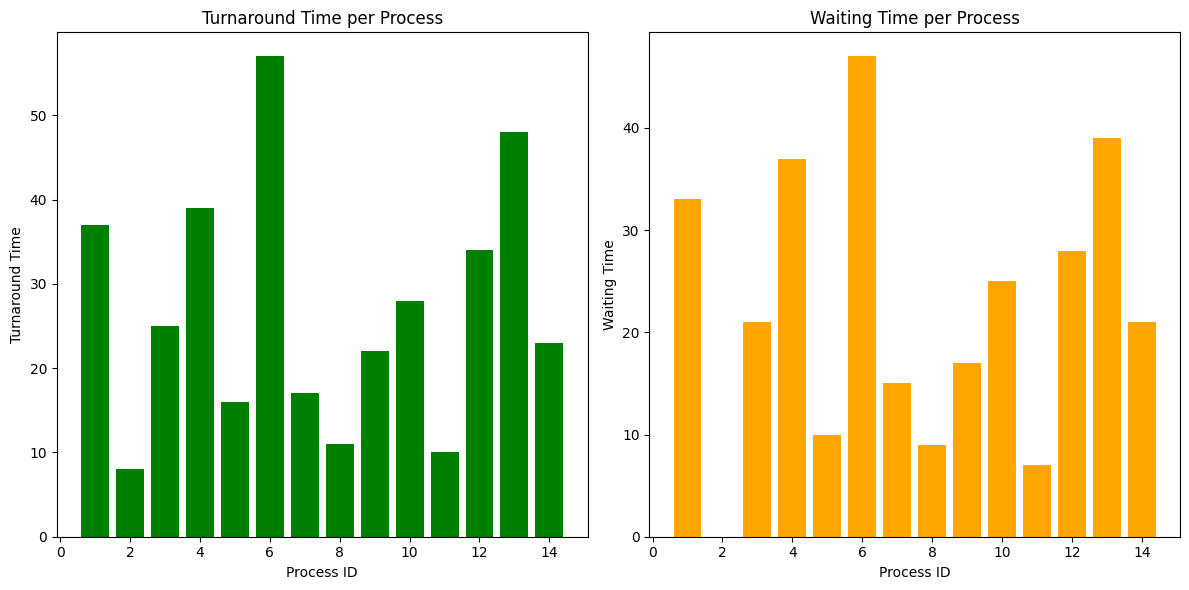

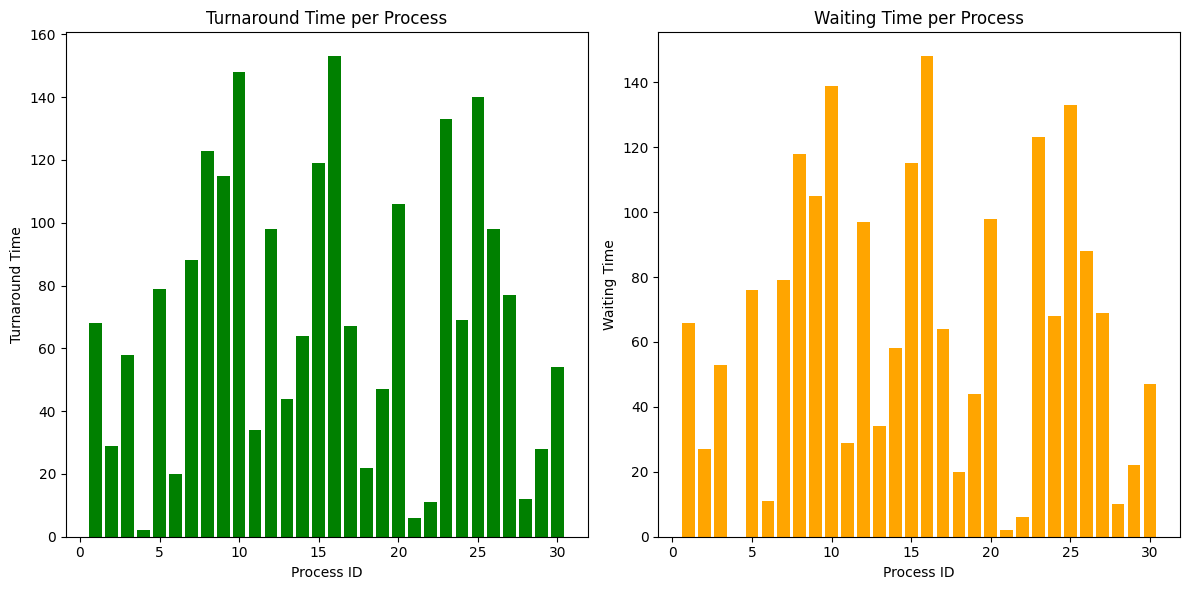

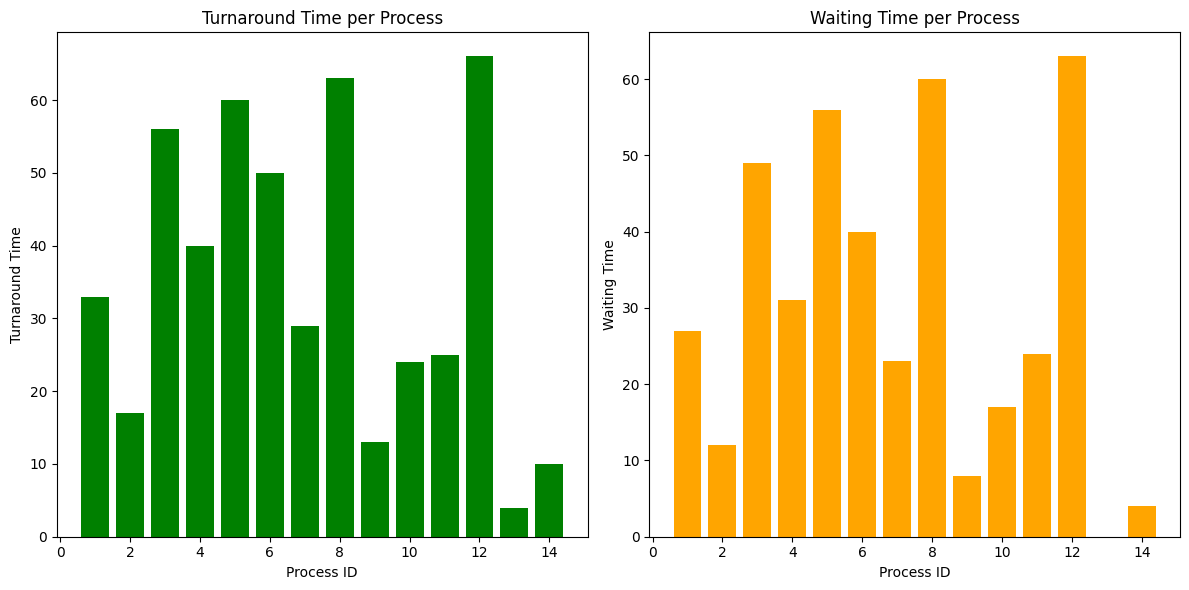

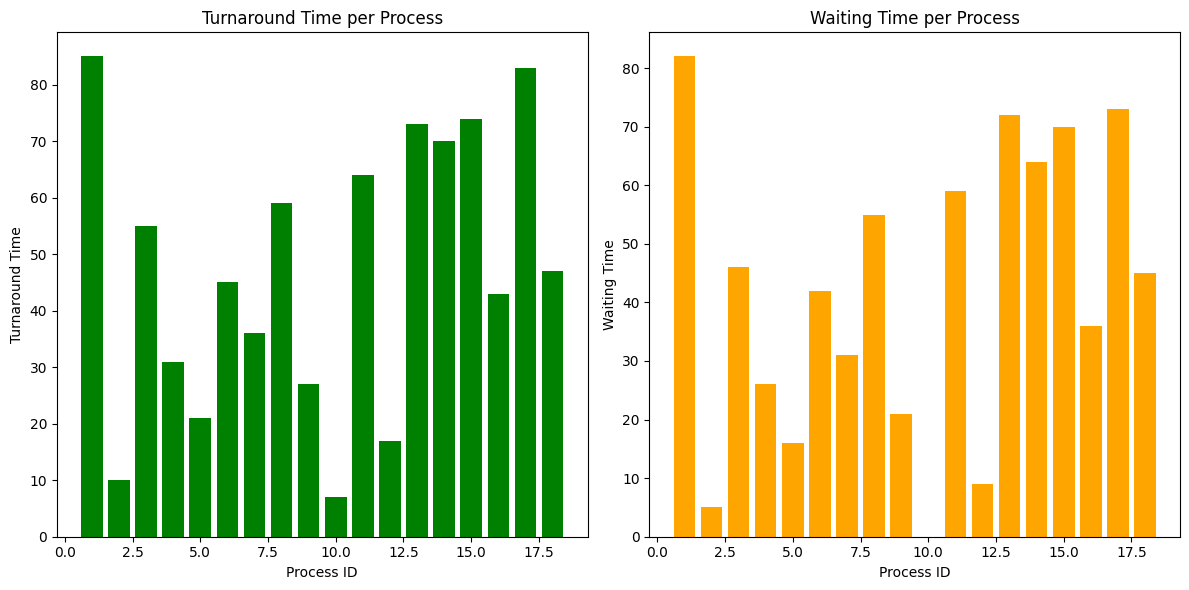

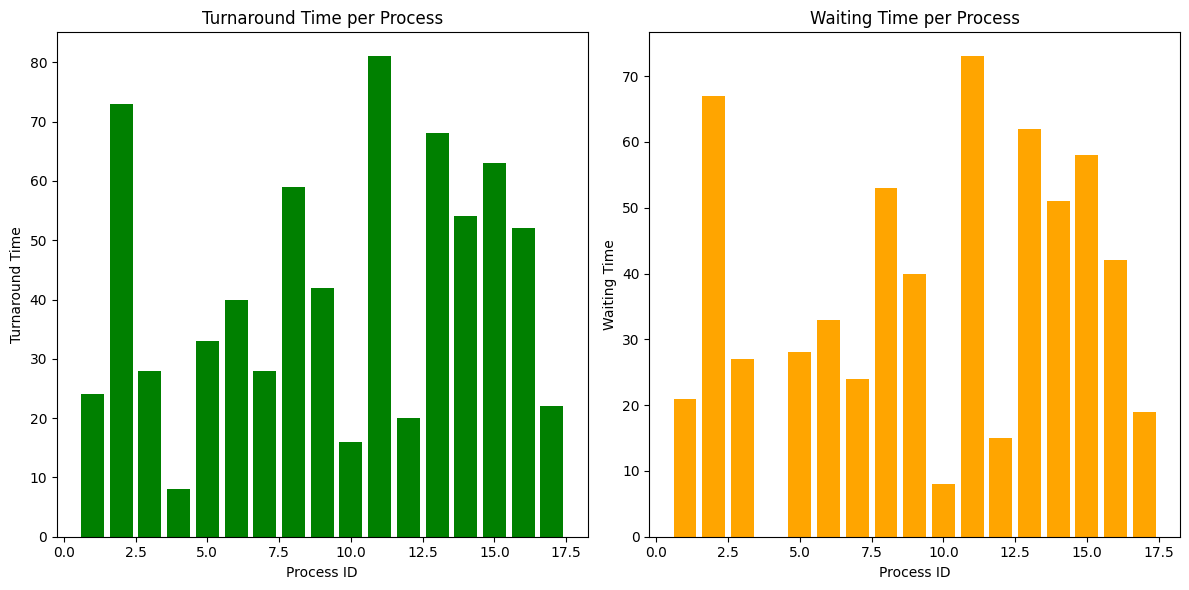

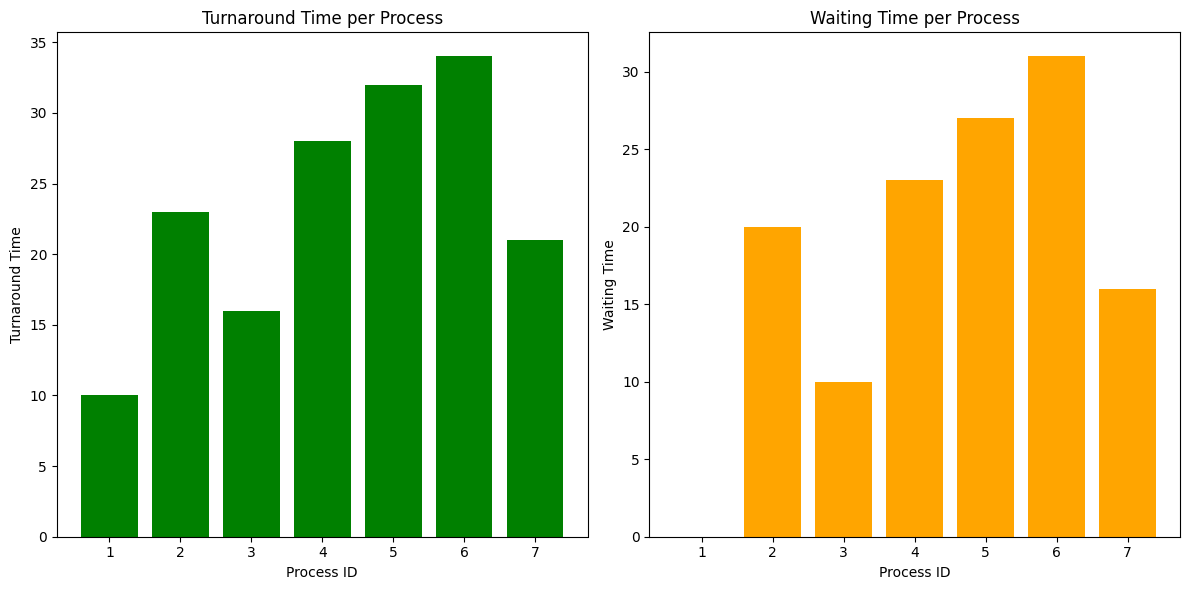

In [33]:
for x in range(num_simulations):
    plot_histograms(fcfs_processes[x])

<h2> Result Analysis 

<p> Let's look at the Average Turnaround Time, Waiting Time and Min/Max/Range of them both 

In [37]:
total_avg_waiting_time = 0
total_avg_turnaround_time = 0
total_cpu_utilization = 0

total_min_waiting_time = float('inf')
total_max_waiting_time = float('-inf')

total_min_turnaround_time = float('inf')
total_max_turnaround_time = float('-inf')

for x in range(num_simulations): 
    pids = [process.pid for process in fcfs_processes[x]]
    waiting_times = [process.waiting_time for process in fcfs_processes[x]]
    turnaround_times = [process.turnaround_time for process in fcfs_processes[x]]

    num_processes = len(pids)

    avg_waiting_time = sum(waiting_times) / num_processes
    avg_turnaround_time = sum(turnaround_times) / num_processes

    busy_time = sum([process.burst_time for process in fcfs_processes[x]])  
    total_time = fcfs_processes[x][-1].completion_time  
    cpu_utilization = (busy_time / total_time) * 100 

    total_avg_waiting_time += avg_waiting_time
    total_avg_turnaround_time += avg_turnaround_time
    total_cpu_utilization += cpu_utilization

    total_min_waiting_time = min(total_min_waiting_time, min(waiting_times))
    total_max_waiting_time = max(total_max_waiting_time, max(waiting_times))

    total_min_turnaround_time = min(total_min_turnaround_time, min(turnaround_times))
    total_max_turnaround_time = max(total_max_turnaround_time, max(turnaround_times))

avg_waiting_time_all_simulations = total_avg_waiting_time / num_simulations
avg_turnaround_time_all_simulations = total_avg_turnaround_time / num_simulations
avg_cpu_utilization_all_simulations = total_cpu_utilization / num_simulations

print("Average Waiting Time Across All Simulations:", avg_waiting_time_all_simulations)
print("Average Turnaround Time Across All Simulations:", avg_turnaround_time_all_simulations)
print("Average CPU Utilization Across All Simulations:", avg_cpu_utilization_all_simulations)

print("Min Waiting Time Across All Simulations:", total_min_waiting_time)
print("Max Waiting Time Across All Simulations:", total_max_waiting_time)
print("Range Waiting Time Across All Simulations:", total_max_waiting_time - total_min_waiting_time)

print("Min Turnaround Time Across All Simulations:", total_min_turnaround_time)
print("Max Turnaround Time Across All Simulations:", total_max_turnaround_time)
print("Range Turnaround Time Across All Simulations:", total_max_turnaround_time - total_min_turnaround_time)

print("Waiting Time Ratio: ", total_avg_waiting_time / total_avg_turnaround_time)


Average Waiting Time Across All Simulations: 31.047776341305756
Average Turnaround Time Across All Simulations: 36.09076563958917
Average CPU Utilization Across All Simulations: 96.15111256902301
Min Waiting Time Across All Simulations: 0
Max Waiting Time Across All Simulations: 148
Range Waiting Time Across All Simulations: 148
Min Turnaround Time Across All Simulations: 1
Max Turnaround Time Across All Simulations: 153
Range Turnaround Time Across All Simulations: 152
Waiting Time Ratio:  0.860269262540898


<p> As we can see, we have: <br>

- High overall average CPU Utilization (96%)
- High ratio of Turnaround time to Waiting time (0.86) : Poor scheduling / High waiting times


<h2> Conclusion

<p> Overall, FCFS is a poor scheduling algorithm because of the <b> convoy effect </b>, meaning that the fairness constraint allows a long process to hold up all the time and utilization without intelligent design <br>
The cases using FCFS is a good choice are: <br>

- <b> Required Fairness :</b> FIFO 
- <b> low requirement scheduling :</b> equal burst times / simple batch processing environments</b>
- <b> non-preemptive scheduling </b>: 

Algorithms like <b> Shortest Job First </b> or <b> Round Robin </b> offer better scheduling because they prioritize processes based on their length or give processes equal attention over time, helping reduce waiting and turnaround times